# **Global Inflation Rate Analysis (1960-2023)**


*This project analyzes global inflation trends from 1960 to 2023 using World Bank data. We will explore inflation variations across countries and over time, perform trend analysis, and visualize key insights.*

# **Import Libraries**

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# **Load & Inspect Data**

In [47]:
# Upload manually or use Google Drive link
file_path = "inflation.csv"

# Load dataset
inflation= pd.read_csv(file_path,skiprows=4)

inflation.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.245878,6.571396,6.399343,4.720805,4.653665,5.405162,7.240978,10.773751,7.126975,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.130817,1.487416,1.725486,1.784050,1.983092,2.490378,3.745700,7.949251,4.953050,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,9.355972,30.694415,29.844480,19.628938,17.080954,22.271539,25.754295,21.355290,13.644102,NaN


In [48]:
#Data structure
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            70 non-null     float64
 5   1961            72 non-null     float64
 6   1962            74 non-null     float64
 7   1963            74 non-null     float64
 8   1964            79 non-null     float64
 9   1965            86 non-null     float64
 10  1966            93 non-null     float64
 11  1967            99 non-null     float64
 12  1968            100 non-null    float64
 13  1969            101 non-null    float64
 14  1970            107 non-null    float64
 15  1971            111 non-null    float64
 16  1972            113 non-null    float64
 17  1973            116 non-null    flo

# **Data Processing and Transformation**

In [49]:
inflation=inflation.drop(columns=["Indicator Name","Indicator Code","Unnamed: 68"])

In [50]:
inflation = inflation.melt(id_vars=["Country Name", "Country Code"],
                           var_name="Year",
                           value_name="Inflation Rate")

# Convert 'Year' to integer safely
inflation["Year"] = pd.to_numeric(inflation["Year"], errors="coerce")

# Drop NaN values (invalid years)
inflation = inflation.dropna(subset=["Year"])

# Convert 'Year' column to integer
inflation["Year"] = inflation["Year"].astype(int)

# Display cleaned data
print(inflation)

                      Country Name Country Code  Year  Inflation Rate
0                            Aruba          ABW  1960             NaN
1      Africa Eastern and Southern          AFE  1960             NaN
2                      Afghanistan          AFG  1960             NaN
3       Africa Western and Central          AFW  1960             NaN
4                           Angola          AGO  1960             NaN
...                            ...          ...   ...             ...
17019                       Kosovo          XKX  2023        4.944324
17020                  Yemen, Rep.          YEM  2023             NaN
17021                 South Africa          ZAF  2023        6.073909
17022                       Zambia          ZMB  2023       10.884532
17023                     Zimbabwe          ZWE  2023             NaN

[17024 rows x 4 columns]


In [51]:
# Drop rows where Inflation Rate is NaN
inflation = inflation.dropna(subset=["Inflation Rate"])
inflation.head()


,Country Name,Country Code,Year,Inflation Rate
13,Australia,AUS,1960,3.728814
14,Austria,AUT,1960,1.945749
17,Belgium,BEL,1960,0.299467
19,Burkina Faso,BFA,1960,7.788162
28,Bolivia,BOL,1960,11.533153


In [52]:
# Select specific countries
selected_countries = ["India", "United States", "United Kingdom"]
inflation_filtered = inflation[inflation["Country Name"].isin(selected_countries)]
print(inflation_filtered)

         Country Name Country Code  Year  Inflation Rate
81     United Kingdom          GBR  1960        1.003576
109             India          IND  1960        1.779878
251     United States          USA  1960        1.457976
347    United Kingdom          GBR  1961        3.447496
375             India          IND  1961        1.695213
...               ...          ...   ...             ...
16601           India          IND  2022        6.699034
16743   United States          USA  2022        8.002800
16839  United Kingdom          GBR  2023        6.793967
16867           India          IND  2023        5.649143
17009   United States          USA  2023        4.116338

[192 rows x 4 columns]


# **Exploratory Data Analysis (EDA) & Visualization**

**Inflation Trends in different country**

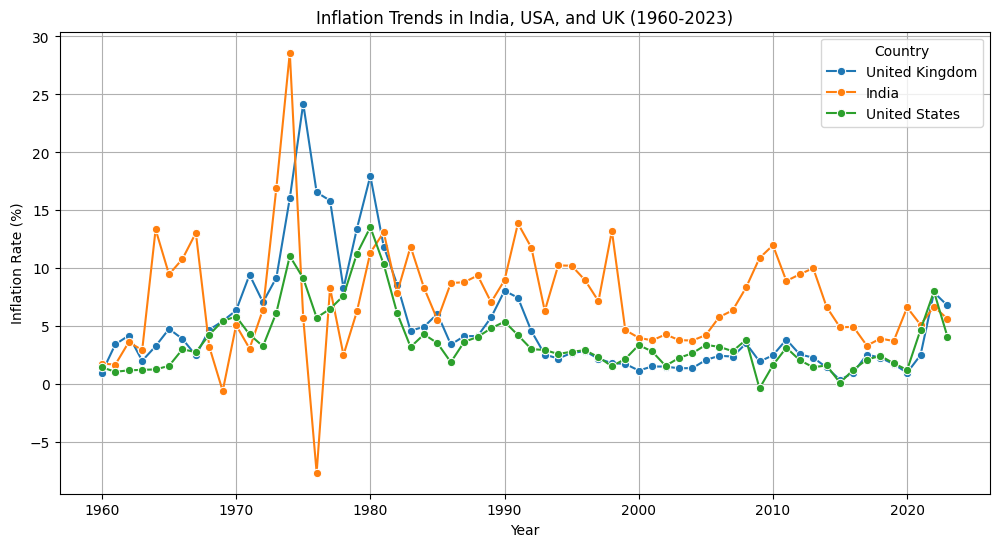

In [53]:
selected_countries = ["India", "United States", "United Kingdom"]
inflation_filtered = inflation[inflation["Country Name"].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=inflation_filtered, x="Year", y="Inflation Rate", hue="Country Name", marker="o")

plt.title("Inflation Trends in India, USA, and UK (1960-2023)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend(title="Country")
plt.grid(True)
plt.show()


**Top 10 Countries by Inflation rate by a specific year**

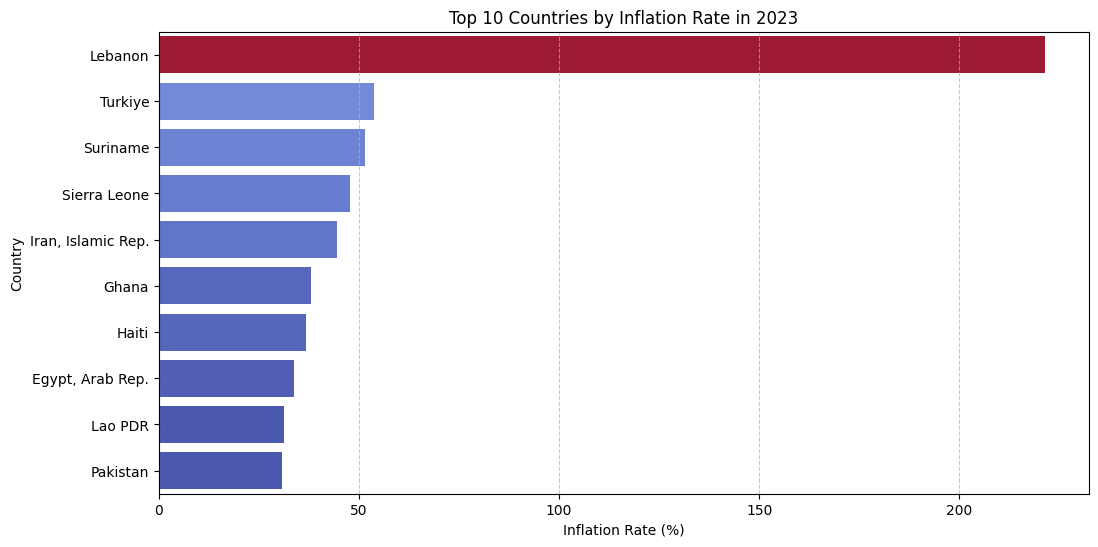

In [54]:
# Select a specific year, e.g., 2023
year_selected = 2023
inflation_year = inflation[inflation["Year"] == year_selected]

# Sort countries by inflation rate
inflation_year = inflation_year.sort_values(by="Inflation Rate", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=inflation_year, x="Inflation Rate", y="Country Name", hue="Inflation Rate", palette="coolwarm", legend=False)


plt.title(f"Top 10 Countries by Inflation Rate in {year_selected}")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


**Inflation rate variability**

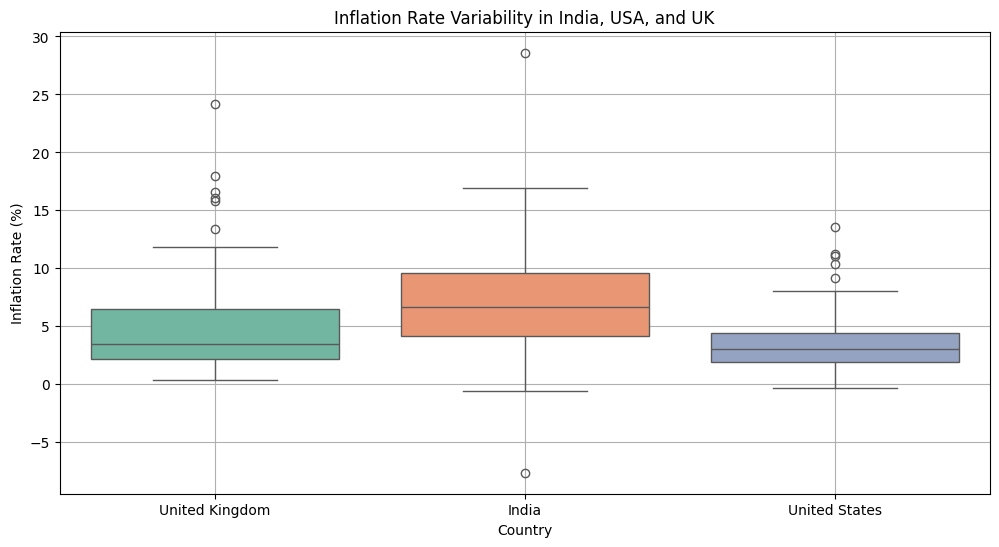

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=inflation_filtered, x="Country Name", y="Inflation Rate", hue="Country Name", palette="Set2", dodge=False)

plt.title("Inflation Rate Variability in India, USA, and UK")
plt.xlabel("Country")
plt.ylabel("Inflation Rate (%)")
plt.grid(True)
plt.show()


**Inflation Trends in different country**

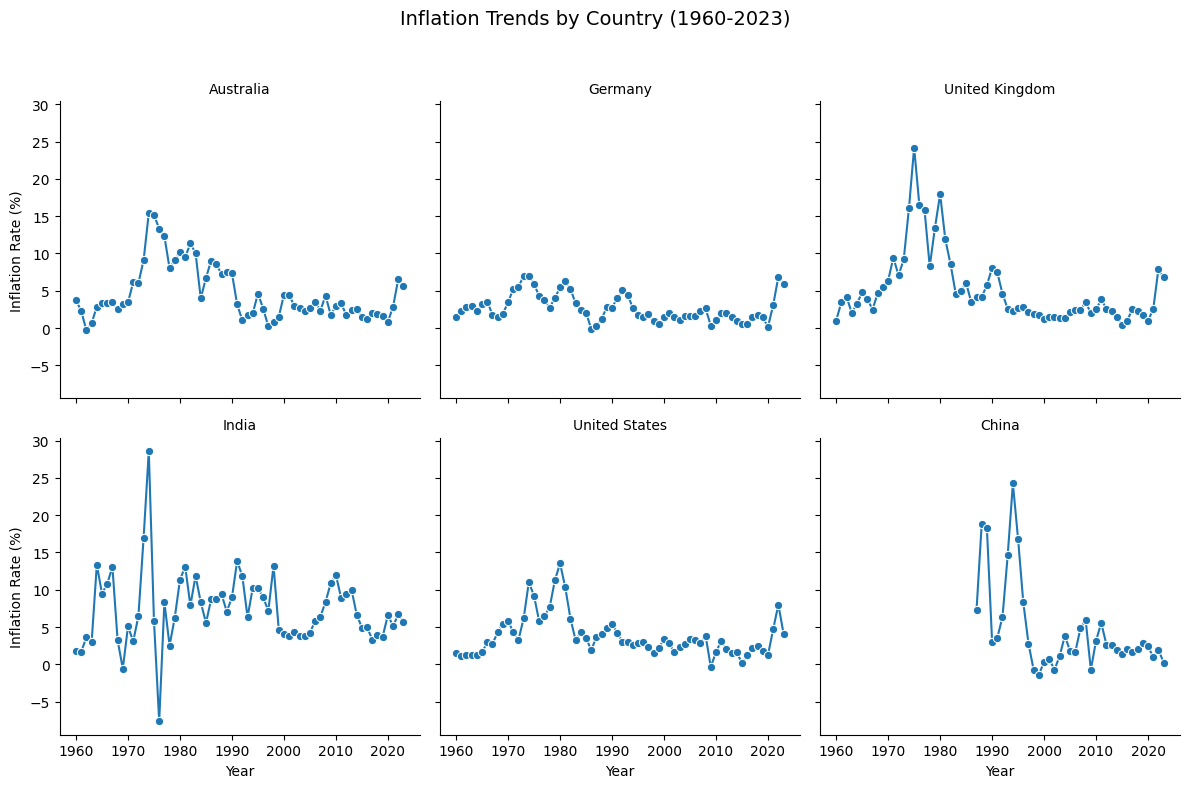

In [56]:
# Select a few major countries for comparison
selected_countries = ["India", "United States", "United Kingdom", "China", "Germany","Australia"]
inflation_filtered = inflation[inflation["Country Name"].isin(selected_countries)]

# Create FacetGrid for multiple line plots
g = sns.FacetGrid(inflation_filtered, col="Country Name", col_wrap=3, sharey=True, height=4)
g.map(sns.lineplot, "Year", "Inflation Rate", marker="o")

# Adjust titles and layout
g.fig.suptitle("Inflation Trends by Country (1960-2023)", fontsize=14)
g.set_axis_labels("Year", "Inflation Rate (%)")
g.set_titles("{col_name}")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing

plt.show()


# **Trend Analysis**

**Moving Average**

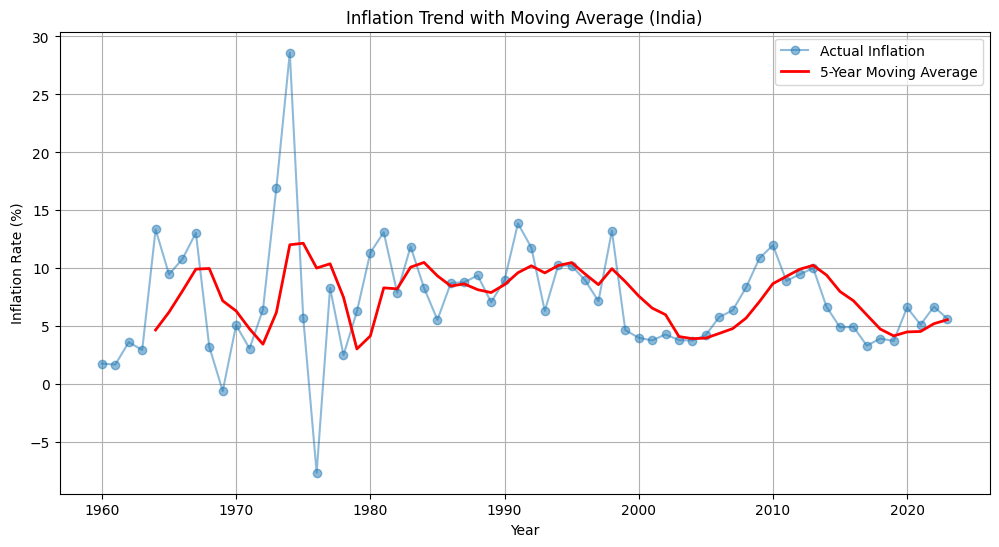

In [57]:
# Select a country for analysis (change as needed)
country_selected = "India"
inflation_country = inflation[inflation["Country Name"] == country_selected].copy()

# Calculate a 5-year moving average
inflation_country["Moving_Avg"] = inflation_country["Inflation Rate"].rolling(window=5).mean()

# Plot the original inflation vs. moving average
plt.figure(figsize=(12, 6))
plt.plot(inflation_country["Year"], inflation_country["Inflation Rate"], label="Actual Inflation", marker="o", linestyle="-", alpha=0.5)
plt.plot(inflation_country["Year"], inflation_country["Moving_Avg"], label="5-Year Moving Average", color="red", linewidth=2)

plt.title(f"Inflation Trend with Moving Average ({country_selected})")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()


**Decomposition**

<Figure size 1200x800 with 0 Axes>

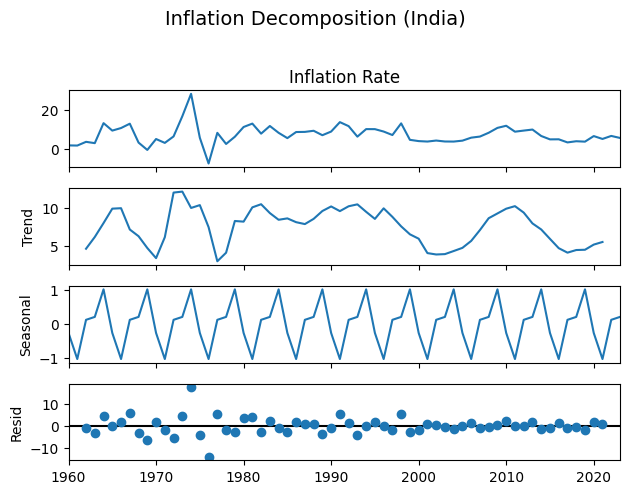

In [58]:
# Perform decomposition
decomposition = seasonal_decompose(inflation_country.set_index("Year")["Inflation Rate"], model="additive", period=5)

# Set figure size before plotting
plt.figure(figsize=(12, 8))

# Plot decomposition
decomposition.plot()

# Adjust title position and layout
plt.suptitle(f"Inflation Decomposition ({country_selected})", fontsize=14, y=1.02)  # Move title slightly up
plt.tight_layout()  # Prevent overlapping
plt.show()


**Rolling mean**

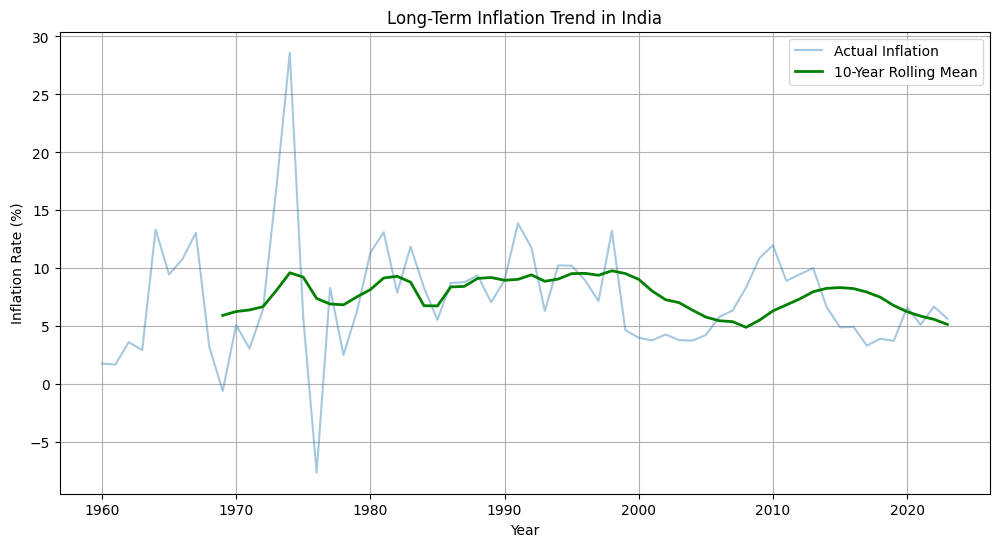

In [59]:
plt.figure(figsize=(12, 6))

# Rolling average for trend detection
inflation_country["Trend"] = inflation_country["Inflation Rate"].rolling(window=10).mean()

plt.plot(inflation_country["Year"], inflation_country["Inflation Rate"], label="Actual Inflation", alpha=0.4)
plt.plot(inflation_country["Year"], inflation_country["Trend"], label="10-Year Rolling Mean", color="green", linewidth=2)

plt.title(f"Long-Term Inflation Trend in {country_selected}")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()


# **Predictive Analysis**

ADF Statistic: -2.1611372263038455
p-value: 0.22065140973254727
The data is non-stationary. Differencing is required.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

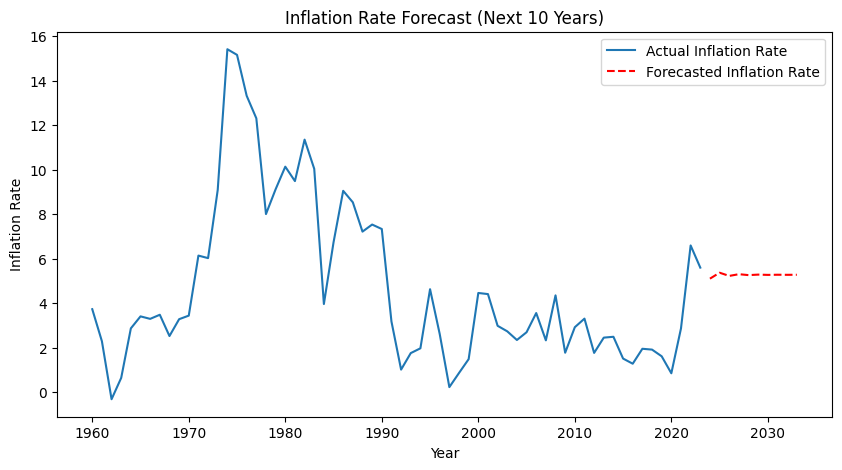

In [62]:
 # Select a country for analysis (change as needed)
country_selected = "Australia"
inflation_country = inflation[inflation["Country Name"] == country_selected].copy()


# Load dataset (assuming inflation_country has 'Year' as index and 'Inflation Rate' column)
inflation_country.set_index("Year", inplace=True)

# Step 1: Check Stationarity using Augmented Dickey-Fuller Test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] > 0.05:
        print("The data is non-stationary. Differencing is required.")
    else:
        print("The data is stationary. No differencing needed.")

check_stationarity(inflation_country["Inflation Rate"])

# Step 2: Apply Differencing if Needed
inflation_country["Differenced"] = inflation_country["Inflation Rate"].diff().dropna()

# Step 3: Fit ARIMA Model (choosing p=1, d=1, q=1 for simplicity)
model = ARIMA(inflation_country["Inflation Rate"], order=(1,1,1))
arima_result = model.fit()

# Step 4: Forecast Next 10 Years
forecast = arima_result.forecast(steps=10)

# Step 5: Plot the Forecasted Inflation Rate
plt.figure(figsize=(10,5))
plt.plot(inflation_country.index, inflation_country["Inflation Rate"], label="Actual Inflation Rate")
plt.plot(range(inflation_country.index[-1] + 1, inflation_country.index[-1] + 11), forecast, label="Forecasted Inflation Rate", linestyle="dashed", color="red")
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.title("Inflation Rate Forecast (Next 10 Years)")
plt.legend()
plt.show()


# **Key Observation**

**Inflation Trends Over the Years**


*   We observed fluctuations in inflation rates across different countries, with some showing high volatility and others being relatively stable.
*   Certain periods, such as the 1970s and 2008, showed sharp spikes, likely due to economic crises or policy changes.



**Country-Wise Inflation Comparison**



*   Developed nations (e.g., USA, UK) tend to have lower and more stable inflation rates.
*   Developing nations (e.g., India, Brazil) often experience higher and more volatile inflation, possibly due to policy changes, economic growth, and global market influence.


**Trend Analysis**

*   Moving averages helped smooth out short-term fluctuations, showing underlying long-term trends.
*   Seasonal decomposition revealed cyclic patterns, indicating periodic economic factors affecting inflation.

**Predictive Analysis (Forecasting)**


*   The ARIMA model provided a reasonable estimate of future inflation trends.
*   Some non-stationary trends required differencing for proper time series forecasting.
*   Forecasts showed potential future inflation spikes or dips, which can aid economic planning.